# Explore the Data

## Load the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('tweets.csv', sep="\t")

In [4]:
df.head()

,created_at,screen_name,text
0,Fri Nov 18 23:59:58 +0000 2016,arunprasad72,RT @Praveen_1singh: First the stone pelting st...
1,Fri Nov 18 23:59:49 +0000 2016,pranavkisu,RT @NewDelhiTimesIN: Is the #demonetization of...
2,Fri Nov 18 23:59:48 +0000 2016,bablumohan,RT @scoopwhoopnews: #BREAKING Banks across Ind...
3,Fri Nov 18 23:59:37 +0000 2016,NagrathRob,RT @DrGPradhan: .@ravishndtv of @ndtv spreadin...
4,Fri Nov 18 23:59:28 +0000 2016,ManishPrasa,RT @YesIamSaffron: जब भी #Demonetization व् का...


## Creating a Wordcloud

Now let us visually see which are the words that are most prominent. This requires us to find all the words in the `title` and create a frequency count for how many times the word occurs.

In [5]:
import nltk
from wordcloud import WordCloud

In [6]:
from spacy.en import English

In [7]:
parser = English()

In [8]:
text_list = df.text.tolist()

In [9]:
text_string = ''.join(str(text_list))

In [10]:
len(text_string)

1574243

In [11]:
parsedData = parser(text_string)

In [12]:
tokens = []
lemmas = []

In [41]:
for i,token in enumerate(parsedData):
    #print(token, token.pos_, token.is_punct, token.lemma_, token.ent_type_)
    if token.is_punct is False:
        tokens.append(token)
        lemmas.append(token.lemma_)
       
        
    #if i==10:
        #break

[ PUNCT True [ 
" PUNCT True " 
RT PROPN False rt WORK_OF_ART
@Praveen_1singh NOUN False @praveen_1singh WORK_OF_ART
: PUNCT True : WORK_OF_ART
First ADV False first WORK_OF_ART
the DET False the WORK_OF_ART
stone NOUN False stone WORK_OF_ART
pelting VERB False pelt 
stopped VERB False stop 
and CONJ False and 


Let us take all the sentence in the dataframe and tokenize to find the words, and get a frequency of count of each 
words

In [14]:
frequency_words_token = {}

In [15]:
for token in tokens:
    if token in frequency_words_token:
        count = frequency_words_token[token]
        count = count + 1
        frequency_words_token[str(token)] = count
    else:
        frequency_words_token[str(token)] = 1

In [16]:
from wordcloud import WordCloud

In [17]:
# Creating a Wordcloud
wordcloud = WordCloud()

In [18]:
wordcloud.generate_from_frequencies(frequency_words_token.items())

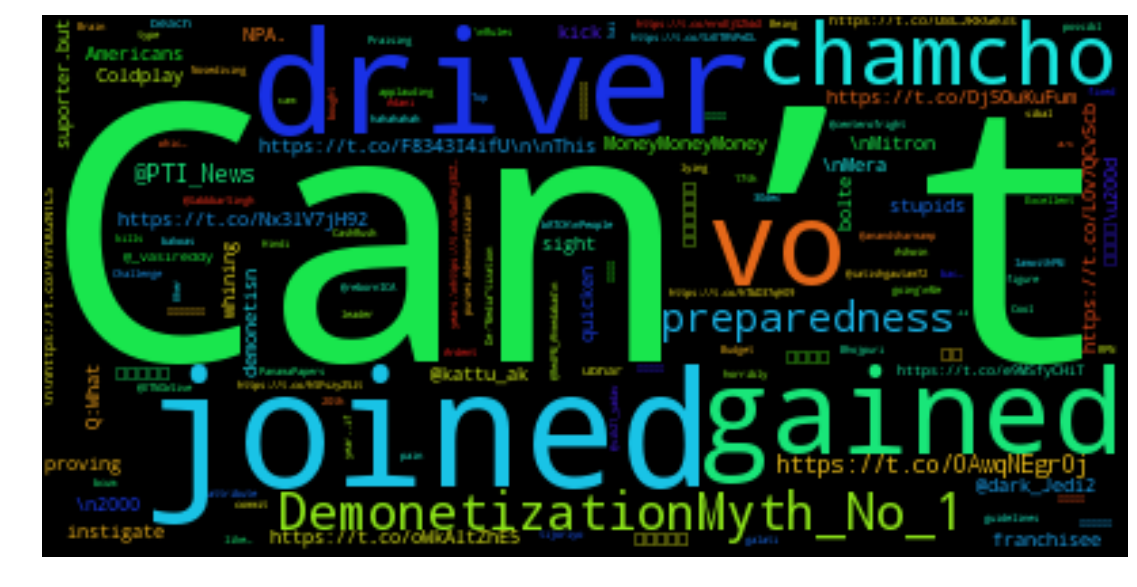

In [19]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Question - What are the two issue with this wordcloud?**

In [20]:
# Convert the dict to a dataframe
freq = pd.DataFrame.from_dict(frequency_words_token, orient = 'index')

In [22]:
# Let us sort them in descinding order
freq.sort_values(by = 0, ascending=False).head(10)

,0
Can’t,1
aamaadmiparty,1
भीख,1
censor,1
@iamsrk,1
she,1
@SPSSM,1
installed,1
politi…,1
Slave,1


# Stopword Removal

Stop words are words which are filtered out before or after processing of natural language data. Though stop words usually refer to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search.

In [23]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [24]:
from nltk.corpus import stopwords
# nltk.download()

In [25]:
STOPLIST = set(stopwords.words('english') + ["n't", "'s", "'m", "ca"] + list(ENGLISH_STOP_WORDS))

In [31]:
STOPLIST = list(STOPL)

We will recreate the frequency words with two additional steps
- Remove all the stop words in our count
- Make every word lower case

In [32]:
frequency_words_wo_stop = {}
for token in tokens:
    if token not in STOPLIST:
        if token in frequency_words_token:
            count = frequency_words_token[token]
            count = count + 1
            frequency_words_token[str(token)] = count
        else:
            frequency_words_token[str(token)] = 1

In [33]:
wordcloud.generate_from_frequencies(frequency_words_token.items())

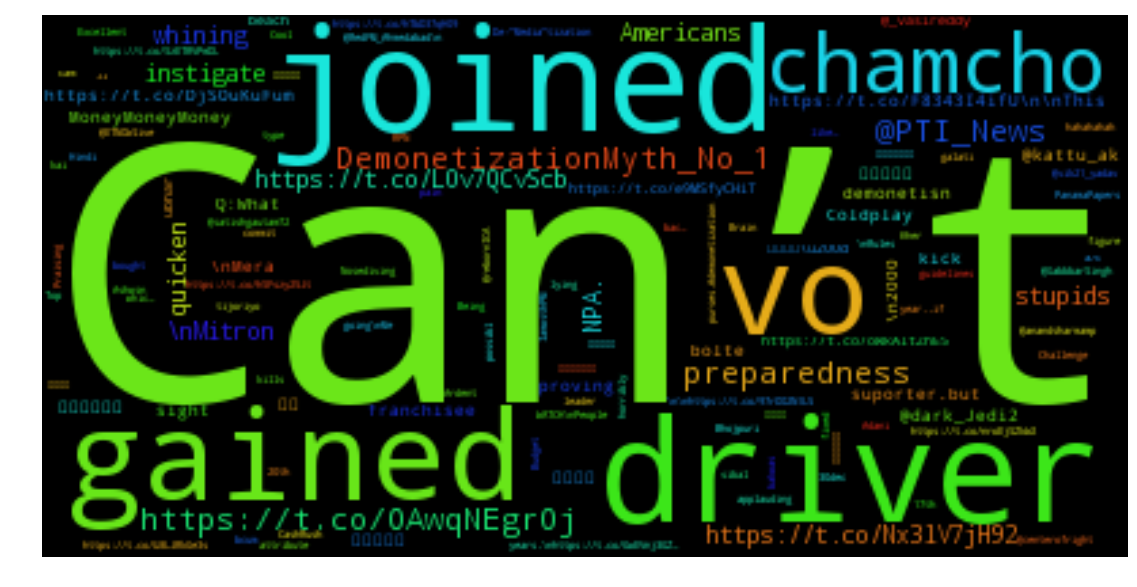

In [34]:
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We can also extend the stopword list with common punctuations to even reomove those from the list

In [35]:
STOPLIST.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [36]:
frequency_words_wo_stop = {}

**Exercise**: Find the frequency count for each word without stopword

**Note: Stemming and Lemma in the context of Recall ** 

# Part of Speech (POS) tagging

https://displacy.spacy.io/displacy/index.html?full=Click+the+button+to+see+this+sentence+in+displaCy.

Let us go back to school. Schools commonly teach that there are 9 parts of speech in English: noun, verb, article, adjective, preposition, pronoun, adverb, conjunction, and interjection.

Part-of-speech tagging is one of the most important text analysis tasks used to classify words into their part-of-speech and label them according the tagset which is a collection of tags used for the pos tagging. Part-of-speech tagging also known as word classes or lexical categories. Here is the definition from wikipedia:

In corpus linguistics, part-of-speech tagging (POS tagging or POST), also called grammatical tagging or word-category disambiguation, is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition, as well as its context—i.e. relationship with adjacent and related words in a phrase, sentence, or paragraph. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

Once performed by hand, POS tagging is now done in the context of computational linguistics, using algorithms which associate discrete terms, as well as hidden parts of speech, in accordance with a set of descriptive tags. POS-tagging algorithms fall into two distinctive groups: rule-based and stochastic. E. Brill’s tagger, one of the first and most widely used English POS-taggers, employs rule-based algorithms.

In [53]:
text = 'Calvin harris is a great musician'

**Tag | Meaning	| English Examples**

Tag  | Meaning    | Examples
---- |----------- | --------------------
ADJ	 | adjective  | new, good, high, special, big, local
ADP	 | adposition |	on, of, at, with, by, into, under
ADV	 | adverb	  | really, already, still, early, now
CONJ | conjunction|	and, or, but, if, while, although
DET	 | determiner | the, a, some, most, every, no, which
NOUN | noun	      | year, home, costs, time, Africa
NUM	 | numeral	  | twenty-four, fourth, 1991, 14:24
PRT	 | particle	  | at, on, out, over per, that, up, with
PRON | pronoun	  | he, their, her, its, my, I, us
VERB | verb	      | is, say, told, given, playing, would
0	 | punctuation marks |	. , ; !
X	 | other	  | ersatz, esprit, dunno, gr8, univeristy


###  Let us generate POS tags for each title

## Entity Extraction

** Now using pos tags we can extract entities i.e find the primary focus of the sentence **


Named Entity-Type | Examples
------------------| -------------------------
ORGANIZATION	| Georgia-Pacific Corp., WHO
PERSON	        | Eddy Bonte, President Obama
LOCATION	    | Murray River, Mount Everest
DATE	        | June, 2008-06-29
TIME	        | two fifty a m, 1:30 p.m.
MONEY	        | 175 million Canadian Dollars, GBP 10.40
PERCENT	        |  twenty pct, 18.75 %
FACILITY	    | Washington Monument, Stonehenge
GPE	            | South East Asia, Midlothian

To do the entity identification, we will **download the maxent chunker and words corpora **

** Now that we have entities, we can understand the statements better **

Exercise : Build a data frame for each tweet with Tweet, token, lemma, POS List, Entity List